In [1]:
from langchain_community.document_loaders import PyPDFLoader
pdf_file_path = './documents/income_tax.pdf'
loader = PyPDFLoader(pdf_file_path)
pages = []
async for page in loader.alazy_load():
    pages.append(page)

incorrect startxref pointer(1)
parsing for Object Streams


In [2]:
pages[35] # 표의 내용이 포함되지 않음

Document(metadata={'source': './documents/income_tax.pdf', 'page': 35}, page_content='')

In [3]:
# 1. chatgpt 를 활용한 전처리
# 2. zerox (opensource OCR package)

In [4]:
from dotenv import load_dotenv
load_dotenv()
from pyzerox import zerox

/Users/a202304035/llm_agent_practice/.venv/lib/python3.13/site-packages/pydantic/_internal/_config.py:341: UserWarning: Valid config keys have changed in V2:
* 'fields' has been removed
  warnings.warn(message, UserWarning)


In [5]:
import nest_asyncio
nest_asyncio.apply()

In [ ]:
'''
import asyncio

## placeholder for additional model kwargs which might be required for some models
kwargs = {}

## system prompt to use for the vision model
custom_system_prompt = None

# to override
# custom_system_prompt = "For the below PDF page, do something..something..." ## example

###################### Example for OpenAI ######################
model = "gpt-4o-mini" ## openai model

# Define main async entrypoint
async def main():
    file_path = "./documents/income_tax.pdf" ## 로컬 파일 경로 및 파일 URL 지원

    ## 일부 페이지 또는 전체 페이지를 처리
    select_pages = None ## 전체는 None, 특정 페이지는 int 또는 list(int) 페이지 번호 (1부터 시작)

    output_dir = "./documents" ## 통합된 마크다운 파일을 저장할 디렉토리
    result = await zerox(file_path=file_path, model=model, output_dir=output_dir,
                        custom_system_prompt=custom_system_prompt, select_pages=select_pages, **kwargs)
    return result



# run the main function:
result = asyncio.run(main())

# print markdown result
print(result)
'''

In [7]:
from langchain_community.document_loaders import UnstructuredMarkdownLoader
from langchain_core.documents import Document
from langchain_text_splitters import RecursiveCharacterTextSplitter

text_splitter = RecursiveCharacterTextSplitter(
    chunk_size = 1500, # chunk 하나가 가질 수 있는 token 수
    chunk_overlap = 100 # chunk 간 token 을 겹치게 하는 범위 (유사도 검색의 성능을 더 올림)
)


In [8]:
markdown_path = "./documents/income_tax.md"
loader = UnstructuredMarkdownLoader(markdown_path)
document_list =loader.load_and_split(text_splitter)

In [10]:
# markdown 변환시 테이블이 split 변환 과정에서 내용이 잘리기 떄문에 txt 로 변환해 load & split 을 다시 처리해야함
document_list[-10:] 

[Document(metadata={'source': './documents/income_tax.md'}, page_content='국세청장은 제3항에도 불구하고 대통령령으로 정하는 바에 의한 일정 정도의 일정 구간 이하에 해당되는 나래에 지명보험서를 위로 제출하게 할 수 있다.\n\n원천징수의무자가 원천징수하여 대통령령으로 정하는 바에 따라 제출할 원천징수 관련 서류 중 지로명세서에 해당하는 것이 아닌 그 제출한 부분에 대한 사항을 재판해 매출·매입별 계산서합계표(제163조제8항 및 제9항)에 따라 사업자 관련 세무서장이 제출한 매출·매입별 계산서합계표(제163조제8항) 및 법에 따른 전자세금계산서를 국세청장이 제출하는 경우를 포함하다) 과 지명보험에 해당하는 것이 있으면 제출한 부분에 대한 기름명세서를 제출한 경우에는 그 제출한 부분에 대하여 지명명세서를 제출할 것으로 본다.\n\n원천징수와 관련 세무서장, 지자체세장 등 국세청장이 필요한 때는 지명보험서의 제출을 유찰할 수 있다. <신설 2022. 12. 31.>\n\n제1항에 따라 지명자를 대리하거나 위험을 받는 자의 행위는 수급 또는 위험인 비율에 의하면 비율인 외의 비율인이고 행위를 보고 제정법을 적용한다. <개정 2022. 12. 31.>\n\n국세청장은 제19조제1항에 따른 기타소득 중 대통령령, 제20조제1항 외의 경비를 받은 경우에는 사람들로 행세기타소득의 납세의무에 제공하여야 한다. <개정 2022. 12. 31.>\n\n제18항 및 제19항의 규정에 따른 지명보험서의 제출에 필요한 사항은 대통령령으로 정한다. <개정 2022.>\n\n[전문개정 2009. 12. 31.]\n\n[시행일: 2024. 1. 1. 제164조제7항의 개정규정 중 “제3호의 소득” 개정부분]\n\n제164조(지명보험서의 제출)\n\n제2조에 따라 소득세 납세의무가 있는 개인에게 다음 호에 의한 이자 또는 이자를 국내외에 지급하는 자(법인, 제172조제3호에 따른 개인 및 법인과 마찬가지로 지각 권리를 위한 또는 위반

In [11]:
import markdown
from bs4 import BeautifulSoup

with open('./documents/income_tax.md', 'r', encoding='utf-8') as md_file:
    md_content = md_file.read()

html_content = markdown.markdown(md_content)

soup = BeautifulSoup(html_content , 'html.parser')
text_content = soup.get_text()

with open('./documents/income_tax.txt', 'w', encoding='utf-8') as txt_file:
    txt_file.write(text_content)

In [12]:
from langchain_community.document_loaders import TextLoader
text_path = './documents/income_tax.txt'
loader = TextLoader(text_path)
document_list =loader.load_and_split(text_splitter)

In [13]:
from langchain_openai import OpenAIEmbeddings

embeddings = OpenAIEmbeddings(model='text-embedding-3-large')

In [14]:
from langchain_chroma import Chroma

vector_store = Chroma.from_documents(
    documents=document_list,
    embedding=embeddings,
    collection_name = 'income_tax_collection',
    persist_directory = './income_tax_collection'
)

In [15]:
retriever = vector_store.as_retriever(search_kwargs={'k': 3})

In [16]:
query = '연봉 5천만원 직장인의 소득세는?'

In [17]:
retriever.invoke(query)

[Document(metadata={'source': './documents/income_tax.txt'}, page_content='5년 이하: 30만원 → 납입연수\n5년 초과 10년 이하: 150만원 + 50만원 × (납입연수 - 5년)\n10년 초과 20년 이하: 400만원 + 80만원 × (납입연수 - 10년)\n20년 초과: 1,200만원 + 120만원 × (납입연수 - 20년)\n\n② 직장근로자 초과관세환급금을 분배하여 지급받는 경우 세액의 계산 방법 등 필요한 사항은 대통령령으로 정한다. \n<대통령 2014. 12. 23.>\n<전문개정 2009. 12. 31.>\n제64조(부동산매매업자에 대한 세액 계산의 특례)\n1) 대통령령으로 정하는 부동산매매업(이하 “부동산매매업”이라 한다)을 영위하는 거주자가 이하 “부동산매매업자”라 한다)로서 종합소득세법에 제104조제1항제1호(본항을 포함한다) 및 제103조 또는 같은 조 제7항 각 호의 어느 하나에 해당하는 자산의 매매자익(이하 “주택등매매차익”이라 한다)이 있는 자의 종합소득 산출세액은 다음 각 호의 세액 중 많은 것으로 한다. \n<개정 2014. 12. 23., 2017. 12. 19., 2020. 12. 29.>\n1. 종합소득 산출세액\n\n다음 각 목에 따른 세액의 합계액\n  가. 주택등매매차익에 따른 세율을 적용하여 산출한 세액의 합계액\n  나. 종합소득세법 제55조에 따라 주택등매매차익에 대한 개별세액을 공제한 금액을 과세표준으로 하고 이에 제55조에 따른 세율을 적용하여 산출세액'),
 Document(metadata={'source': './documents/income_tax.txt'}, page_content='이자소득에 대해서는 다음과 같이 규정하는 세율\n가. 삭제<2017. 12. 19.>\n나. 비영업대금의 이익에 대해서는 100분의 25. 단, ‘온라인투자연계금융업 및 이용자 보호에 관한 법률’ 제 법 금융위원회에 등록한 온라인투자연계금융업자를 통해 지급받는 

- 1. `state`를 선언하고 에이전트를 생성
- 2. `messages` 커스텀 변수들을 선언
    - `query`는 사용자의 질문을 저장하는 용도로 사용
    - `context`는 벡터 스토어에서 추출한 데이터를 저장하는 용도로 사용
    - `answer`는 최종 응답을 저장하는 용도로 사용

In [18]:
from typing_extensions import List, TypedDict
from langchain_core.documents import Document

class AgentState(TypedDict):
    query: str
    context: List[Document]
    answer: str

In [19]:
from langgraph.graph import StateGraph

graph_builder = StateGraph(AgentState)

In [20]:
# node 선언 (Retrieve , Generate)

def retrieve(state:AgentState):
    query = state['query']
    docs = retriever.invoke(query)
    return {'context':docs}

In [21]:
# prompt 를 직접 쓰는게 아니라 Langsmith 에서 제공하는 prompt 활용
from langchain import hub
from langchain_openai import ChatOpenAI
prompt = hub.pull('rlm/rag-prompt')
llm = ChatOpenAI(model = 'gpt-4o')

In [22]:
def generate(state: AgentState):
    context = state['context']
    query = state['query']
    rag_chain = prompt | llm
    response = rag_chain.invoke({'question': query , 'context': context})
    return {'answer':response}

In [23]:
# graph 구조 선언
graph_builder.add_node('retrieve', retrieve)
graph_builder.add_node('generate', generate)

In [24]:
from langgraph.graph import START ,END

graph_builder.add_edge(START, 'retrieve')
graph_builder.add_edge('retrieve', 'generate')
graph_builder.add_edge('generate', END)

In [25]:
graph = graph_builder.compile()

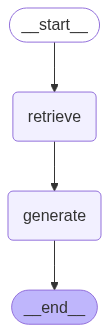

In [26]:
graph

In [27]:
sequence_graph_builder = StateGraph(AgentState).add_sequence([retrieve,generate])

In [28]:
sequence_graph_builder.add_edge(START, 'retrieve')
sequence_graph_builder.add_edge('generate',END)

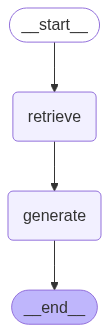

In [30]:
sequence_graph = sequence_graph_builder.compile()
sequence_graph

In [31]:
initial_state = {'query':query}
graph.invoke(initial_state)

{'query': '연봉 5천만원 직장인의 소득세는?',
 'context': [Document(metadata={'source': './documents/income_tax.txt'}, page_content='5년 이하: 30만원 → 납입연수\n5년 초과 10년 이하: 150만원 + 50만원 × (납입연수 - 5년)\n10년 초과 20년 이하: 400만원 + 80만원 × (납입연수 - 10년)\n20년 초과: 1,200만원 + 120만원 × (납입연수 - 20년)\n\n② 직장근로자 초과관세환급금을 분배하여 지급받는 경우 세액의 계산 방법 등 필요한 사항은 대통령령으로 정한다. \n<대통령 2014. 12. 23.>\n<전문개정 2009. 12. 31.>\n제64조(부동산매매업자에 대한 세액 계산의 특례)\n1) 대통령령으로 정하는 부동산매매업(이하 “부동산매매업”이라 한다)을 영위하는 거주자가 이하 “부동산매매업자”라 한다)로서 종합소득세법에 제104조제1항제1호(본항을 포함한다) 및 제103조 또는 같은 조 제7항 각 호의 어느 하나에 해당하는 자산의 매매자익(이하 “주택등매매차익”이라 한다)이 있는 자의 종합소득 산출세액은 다음 각 호의 세액 중 많은 것으로 한다. \n<개정 2014. 12. 23., 2017. 12. 19., 2020. 12. 29.>\n1. 종합소득 산출세액\n\n다음 각 목에 따른 세액의 합계액\n  가. 주택등매매차익에 따른 세율을 적용하여 산출한 세액의 합계액\n  나. 종합소득세법 제55조에 따라 주택등매매차익에 대한 개별세액을 공제한 금액을 과세표준으로 하고 이에 제55조에 따른 세율을 적용하여 산출세액'),
  Document(metadata={'source': './documents/income_tax.txt'}, page_content='이자소득에 대해서는 다음과 같이 규정하는 세율\n가. 삭제<2017. 12. 19.>\n나. 비영업대금의 이익에 대해서는 100분의 25. 단, ‘온라인투자연계금융업 및 이용자 보호